In [2]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Flatten,Dropout,MaxPooling2D,Conv2D,Dense,GlobalAveragePooling2D
from keras.utils import np_utils

Using TensorFlow backend.
/home/inderpreet/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/inderpreet/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/inderpreet/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/inderpreet/.local/lib/python3.6/site-packages/t

In [3]:
dirs = os.listdir("./data/")
print(dirs)

['horses', 'cats', 'dogs', 'Humans']


In [4]:
path='./data/'

In [5]:
images=[]
labels=[]

In [6]:
labels_dict={"horses":0,"cats":1,"dogs":2,"Humans":3}

In [7]:
for ix in dirs:
    classpath=path + ix + "/"
    img_names=os.listdir(classpath)
    for im in img_names:
        im=image.load_img(classpath + im,target_size=(224,224))
        im_array=image.img_to_array(im)
        images.append(im_array)
        labels.append(labels_dict[ix])
        
        

In [8]:
combined = list(zip(images,labels))
random.shuffle(combined)

images[:],labels[:] = zip(*combined) 

In [9]:
X_train=np.array(images)
y_train=np.array(labels)
y_train=np_utils.to_categorical(y_train)
print(X_train.shape,y_train.shape)


(808, 224, 224, 3) (808, 4)


In [ ]:
res_model=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

W0529 14:40:45.863272 140087749941056 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0529 14:40:46.608577 140087749941056 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0529 14:40:47.164963 140087749941056 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0529 14:40:47.621117 140087749941056 deprecation_wrapper.py:119] From /home/inderpreet/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1

In [ ]:
res_model.summary()

In [46]:

c1 = Conv2D(1, (3,3),activation='relu')(res_model.output)
f1 = Flatten()(c1)
fc1 = Dense(4, activation='softmax')(f1)

model = Model(inputs=res_model.inputs, outputs=fc1)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
avg = GlobalAveragePooling2D()(res_model.output)
fc1 = Dense(256, activation='relu')(avg)
fc2 = Dense(4, activation='softmax')(fc1)

model = Model(inputs=res_model.inputs, outputs=fc2)
model.summary()

In [ ]:
for ix,layers in enumerate(model.layers):
    print(ix,layers)

In [ ]:
for ix in range(171):
    model.trainable=False

In [ ]:
model.summary()

In [ ]:
adam=Adam(lr=0.0003)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train,y_train,epochs=10,shuffle=True,batch_size=64,validation_split=0.20)

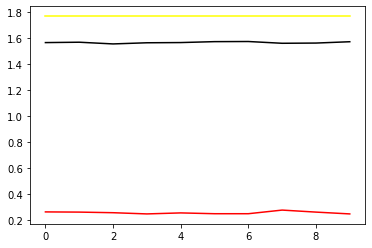

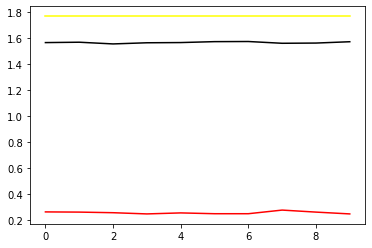

In [49]:
plt.figure(0)
plt.plot(hist.history['acc'],color='red')
plt.plot(hist.history['val_loss'],color='yellow')
plt.plot(hist.history['loss'],color='black')

plt.figure(1)

plt.plot(hist.history['acc'],color='red')
plt.plot(hist.history['val_loss'],color='yellow')
plt.plot(hist.history['loss'],color='black')
plt.show()
